In [1]:
# IMDb+GRU
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, GRU, Dense

# 准备数据
vocab_size = 4000
maxlen = 400
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# 构建 GRU 模型
model_gru = Sequential()
model_gru.add(Embedding(vocab_size, 32, input_length=maxlen))  # 嵌入层
model_gru.add(Dropout(0.3))
model_gru.add(GRU(64))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(1, activation='sigmoid'))  # 输出层
model_gru.build(input_shape=(None, maxlen))
model_gru.summary()

# 编译与训练
model_gru.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_gru = model_gru.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=2)

# 测试
model_gru.evaluate(x_test, y_test, batch_size=64, verbose=2)


C:\Users\siyu_\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 400, 32)             │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 400, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 146,881 (573.75 KB)

 Trainable params: 146,881 (573.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 - 32s - 101ms/step - accuracy: 0.6690 - loss: 0.5923 - val_accuracy: 0.8080 - val_loss: 0.4228
Epoch 2/10
313/313 - 30s - 95ms/step - accuracy: 0.8241 - loss: 0.3993 - val_accuracy: 0.8436 - val_loss: 0.3589
Epoch 3/10
313/313 - 29s - 94ms/step - accuracy: 0.8526 - loss: 0.3477 - val_accuracy: 0.8598 - val_loss: 0.3352
Epoch 4/10
313/313 - 31s - 100ms/step - accuracy: 0.8735 - loss: 0.3137 - val_accuracy: 0.8724 - val_loss: 0.3115
Epoch 5/10
313/313 - 29s - 91ms/step - accuracy: 0.8823 - loss: 0.2956 - val_accuracy: 0.8626 - val_loss: 0.3247
Epoch 6/10
313/313 - 28s - 91ms/step - accuracy: 0.8946 - loss: 0.2694 - val_accuracy: 0.8882 - val_loss: 0.2803
Epoch 7/10
313/313 - 29s - 91ms/step - accuracy: 0.9012 - loss: 0.2504 - val_accuracy: 0.8764 - val_loss: 0.2959
Epoch 8/10
313/313 - 29s - 92ms/step - accuracy: 0.9118 - loss: 0.2263 - val_accuracy: 0.8666 - val_loss: 0.3244
Epoch 9/10
313/313 - 29s - 91ms/step - accuracy: 0.9219 - loss: 0.2054 - val_accuracy: 0.8854 

[0.31682467460632324, 0.8794400095939636]

In [2]:
# IMDb+LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense

# 构建 LSTM 模型
model_lstm = Sequential()
model_lstm.add(Embedding(4000, 32, input_length=400))   # 嵌入层
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(64))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1, activation='sigmoid'))          # 输出层
model_lstm.build(input_shape=(None, maxlen))
model_lstm.summary()

# 编译与训练
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=2)

# 测试
model_lstm.evaluate(x_test, y_test, batch_size=64, verbose=2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 400, 32)             │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 400, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,897 (597.25 KB)

 Trainable params: 152,897 (597.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 - 24s - 77ms/step - accuracy: 0.6776 - loss: 0.5792 - val_accuracy: 0.8272 - val_loss: 0.3961
Epoch 2/10
313/313 - 24s - 78ms/step - accuracy: 0.8371 - loss: 0.3868 - val_accuracy: 0.8416 - val_loss: 0.3777
Epoch 3/10
313/313 - 24s - 76ms/step - accuracy: 0.8609 - loss: 0.3377 - val_accuracy: 0.8288 - val_loss: 0.3933
Epoch 4/10
313/313 - 25s - 80ms/step - accuracy: 0.8759 - loss: 0.3123 - val_accuracy: 0.8768 - val_loss: 0.3019
Epoch 5/10
313/313 - 28s - 89ms/step - accuracy: 0.8858 - loss: 0.2892 - val_accuracy: 0.8730 - val_loss: 0.2975
Epoch 6/10
313/313 - 26s - 84ms/step - accuracy: 0.8928 - loss: 0.2741 - val_accuracy: 0.8362 - val_loss: 0.4605
Epoch 7/10
313/313 - 26s - 83ms/step - accuracy: 0.8978 - loss: 0.2650 - val_accuracy: 0.8752 - val_loss: 0.2940
Epoch 8/10
313/313 - 24s - 78ms/step - accuracy: 0.9019 - loss: 0.2523 - val_accuracy: 0.8772 - val_loss: 0.3067
Epoch 9/10
313/313 - 24s - 76ms/step - accuracy: 0.9078 - loss: 0.2374 - val_accuracy: 0.8844 - 

[0.3453465700149536, 0.8685600161552429]

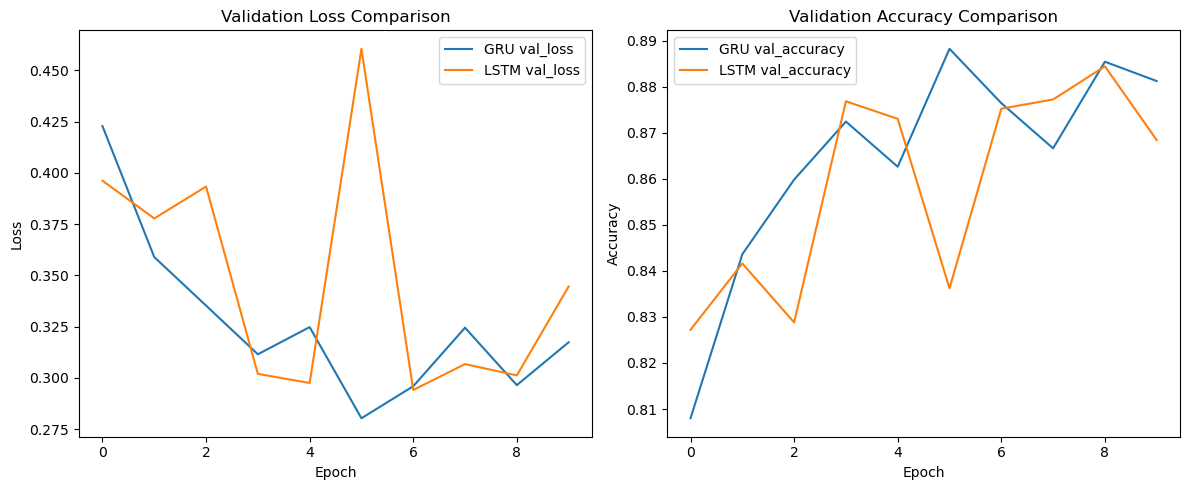

In [3]:
# 对比
import matplotlib.pyplot as plt

# 创建画布
plt.figure(figsize=(12, 5))

# 验证集损失
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['val_loss'], label='GRU val_loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM val_loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 验证集准确率
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['val_accuracy'], label='GRU val_accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM val_accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()